# Math for Machine Learning Exercise

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from PIL import Image
import cv2
import sys
from ipywidgets import interact, interactive, interact_manual

In [20]:
# replace images with the image you want to compress
images = {
    "Cat": np.asarray(Image.open('data/cat.jpeg')),
    
}

In [12]:
def show_images(img_name):
    'It will show image in widgets'
    print("Loading...")
    plt.title("Image Name: "+img_name+"\n")
    plt.imshow(images[img_name])
    plt.axis('off')
    plt.show()

Loading...


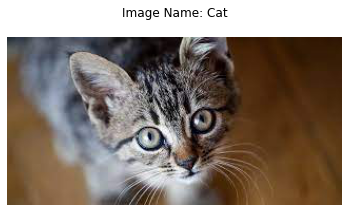

<function __main__.show_images(img_name)>

In [13]:
interact(show_images, img_name=list(images.keys()))

In [31]:
import numpy as np

class PCA:
    def __init__(self, k_components):
        self.k_components = k_components
        self.components = None
        self.X_avg = None

    def fit(self, X):
        self.X_avg = np.mean(X, axis=0)
        X = X - self.X_avg
        # covariance
        covariance = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # save first n eigenvectors
        self.components = eigenvectors[0:self.k_components]

    def transform(self, X):
        # project data
        X = X - self.X_avg
        return np.dot(X, self.components.T)

In [45]:
pca = PCA(12)
img = images['Cat'] 
img_r = np.reshape(img, (img.shape[0], img.shape[1] * img.shape[2]))
pca.fit(img_r)

<ipython-input-47-314efe27d782>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(temp).astype(int))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(159, 318, 3)


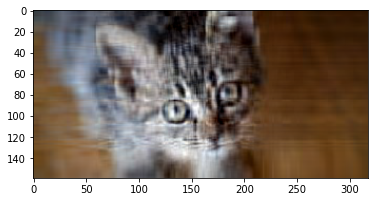

In [47]:
img_c = pca.transform(img_r)
temp = np.dot(img_c, pca.components) + pca.X_avg
temp = np.reshape(temp, img.shape)
print(temp.shape)
plt.imshow(np.array(temp).astype(int))
